In [213]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
from sklearn.preprocessing import PowerTransformer
sns.set_theme(style='whitegrid')

In [238]:
# データの読み込み
path = '../../data/SPEEDA/CompanyList/CompanyListProcessed.csv'
df = pd.read_csv(path, header=0, encoding='cp932')
# print(df.columns)

# Yeo-Johnsonデータの読み込み
path = '../../data/Analysis/analysis_data.csv'
df_yj = pd.read_csv(path, header=0, encoding='cp932')
# print(df_yj.columns)

In [239]:
# 要約統計量
r = list(range(1, 10, 1))
r = list(map(lambda x: x / 10, r))
summary = df.loc[:, [
    'year',
    'prefecture', 'indname_small', 'indname_large', 'b_sales_growth',
    'b_total_assets', 'b_operating_cash_flow', 'b_ros',
    'b_cash_deposit_ratio', 'b_leverage', 'b_stock_price_growth',
    'b_net_profit_growth', 'b_firm_age', 'b_fixed_assets_ratio'
    ]]
summary.describe(percentiles=r)

,b_sales_growth,b_total_assets,b_operating_cash_flow,b_ros,b_cash_deposit_ratio,b_leverage,b_stock_price_growth,b_net_profit_growth,b_firm_age,b_fixed_assets_ratio
count,28258.000000,2.825800e+04,28258.000000,28258.000000,28258.000000,28258.000000,28258.000000,28258.000000,28258.000000,28258.000000
mean,0.020829,2.073837e+05,13461.644490,0.054180,0.420824,2.390006,0.221222,-0.181053,58.892349,0.711618
std,0.183069,6.253914e+05,40925.880467,0.067416,0.535828,1.841599,1.178530,2.583517,25.003046,0.704206
min,-0.878921,1.920000e+02,-29893.000000,-0.663000,0.003844,0.950489,-0.998325,-25.928571,1.000000,0.003819
10%,-0.126338,7.292500e+03,-3.000000,0.004048,0.131695,1.269534,-0.319588,-1.461681,24.000000,0.122442
20%,-0.064228,1.305580e+04,391.000000,0.016425,0.192133,1.412632,-0.187647,-0.688190,38.000000,0.230907
30%,-0.029673,1.962920e+04,793.000000,0.026238,0.243655,1.568297,-0.100314,-0.350651,47.000000,0.317882
40%,-0.004739,2.857380e+04,1355.000000,0.035794,0.294802,1.737480,-0.028849,-0.152622,55.000000,0.406553
50%,0.015900,4.155200e+04,2188.500000,0.046212,0.345648,1.930496,0.033849,-0.007588,61.000000,0.498105
60%,0.035950,6.126800e+04,3565.000000,0.057398,0.401926,2.165154,0.103383,0.096337,66.000000,0.618430


In [221]:
# 要約統計量
r = list(range(0, 100, 10))
r = list(map(lambda x: x / 100, r))
summary = df_yj.loc[:, [
    'year',
    'prefecture', 'indname_small', 'indname_large', 'yj_sales_growth',
    'yj_total_assets', 'yj_operating_cash_flow', 'yj_ros',
    'yj_cash_deposit_ratio', 'yj_leverage', 'yj_stock_price_growth',
    'yj_net_profit_growth', 'yj_firm_age', 'yj_fixed_assets_ratio',
    'earthquake_dummy'
    ]]
# summary.describe(percentiles=r)
summary.describe()

,year,yj_sales_growth,yj_total_assets,yj_operating_cash_flow,yj_ros,yj_cash_deposit_ratio,yj_leverage,yj_stock_price_growth,yj_net_profit_growth,yj_firm_age,yj_fixed_assets_ratio,earthquake_dummy
count,28279.000000,2.827900e+04,2.827900e+04,2.827900e+04,2.827900e+04,2.827900e+04,2.827900e+04,2.827900e+04,2.827900e+04,2.827900e+04,2.827900e+04,28279.000000
mean,2014.789172,-6.030279e-18,9.346932e-16,2.814130e-17,6.633307e-17,-3.175947e-16,-1.660337e-15,1.105551e-17,-3.643293e-18,-3.497562e-16,-2.653323e-16,0.770147
std,3.733857,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,0.420745
min,2008.000000,-9.829725e+00,-4.862264e+00,-1.152904e+01,-8.983808e+00,-2.567132e+00,-2.376773e+00,-4.866478e+00,-8.589572e+00,-2.836599e+00,-1.993016e+00,0.000000
25%,2012.000000,-3.690551e-01,-6.660585e-01,-2.682093e-01,-5.028104e-01,-6.928038e-01,-8.022361e-01,-4.469200e-01,-1.507714e-01,-6.573091e-01,-7.040410e-01,1.000000
50%,2015.000000,5.993457e-02,-1.577554e-02,-2.078389e-01,-1.369608e-01,1.033540e-02,-4.265012e-02,3.816404e-02,3.711257e-02,1.024354e-01,-4.498670e-02,1.000000
75%,2018.000000,4.431490e-01,6.646237e-01,-2.047753e-02,3.767495e-01,6.835634e-01,7.586792e-01,4.933151e-01,1.671273e-01,5.730152e-01,7.195056e-01,1.000000
max,2021.000000,1.172976e+01,2.824898e+00,1.018835e+01,5.700189e+00,3.121533e+00,2.525202e+00,3.884725e+00,9.922819e+00,3.115950e+00,2.469992e+00,1.000000


In [198]:
# カテゴリカルデータ
df.describe(exclude='number')

,firm_name,prefecture,indname_small,indname_large,lag_prefecture
count,27352,27352,27352,27352,27352
unique,2658,44,32,16,44
top,和井田製作所,東京都,卸売業,情報通信・サービスその他,東京都
freq,14,14421,2858,5154,14421


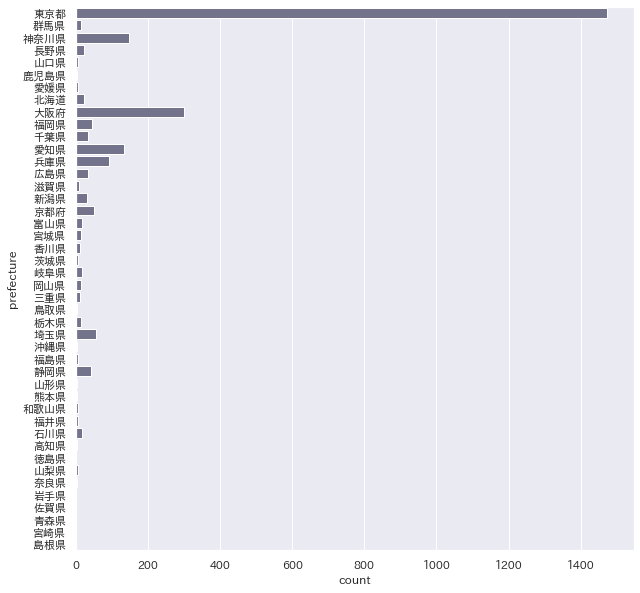

In [222]:
# prefecture
prefecture = df_yj.drop_duplicates(subset=['stock_code'])
sns.set(font='IPAexGothic')
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.countplot(data=prefecture, y='prefecture', color='blue', saturation=0.1)
plt.show()

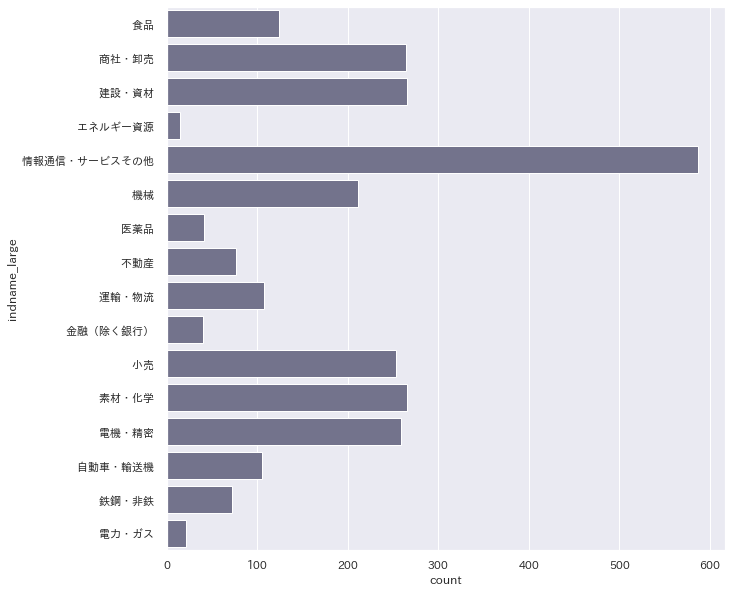

In [223]:
# industry
industry = df_yj.drop_duplicates(subset=['stock_code'])
sns.set(font='IPAexGothic')
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.countplot(data=industry, y='indname_large', color='blue', saturation=0.1)
plt.show()

In [224]:
# 日付データ
y = df['year']
y.describe()

count    28279.000000
mean      2014.789172
std          3.733857
min       2008.000000
25%       2012.000000
50%       2015.000000
75%       2018.000000
max       2021.000000
Name: year, dtype: float64

In [ ]:
df.columns

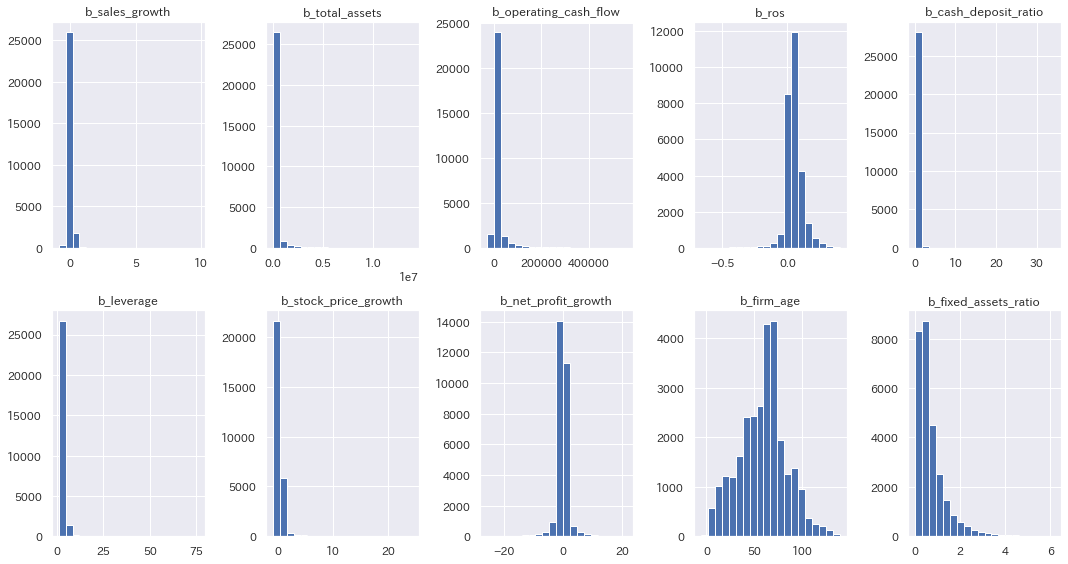

In [225]:
h = df[[
    'b_sales_growth', 'b_total_assets', 'b_operating_cash_flow',
    'b_ros', 'b_cash_deposit_ratio', 'b_leverage', 'b_stock_price_growth',
    'b_net_profit_growth', 'b_firm_age', 'b_fixed_assets_ratio'
    ]]

def draw_hist(s, row, col, q_min=0, q_max=1):
    qmin = s.quantile(q_min)
    qmax = s.quantile(q_max)
    s2 = s[(qmin <= s) & (s <= qmax)]
    axes[row][col].set_title(s2.name)
    axes[row][col].hist(s2, bins=20)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 8))
k = 0
for i in range(2):
    for j in range(5):
        s = h.iloc[:, k]
        draw_hist(s=s, row=i, col=j)
        k += 1

plt.tight_layout()

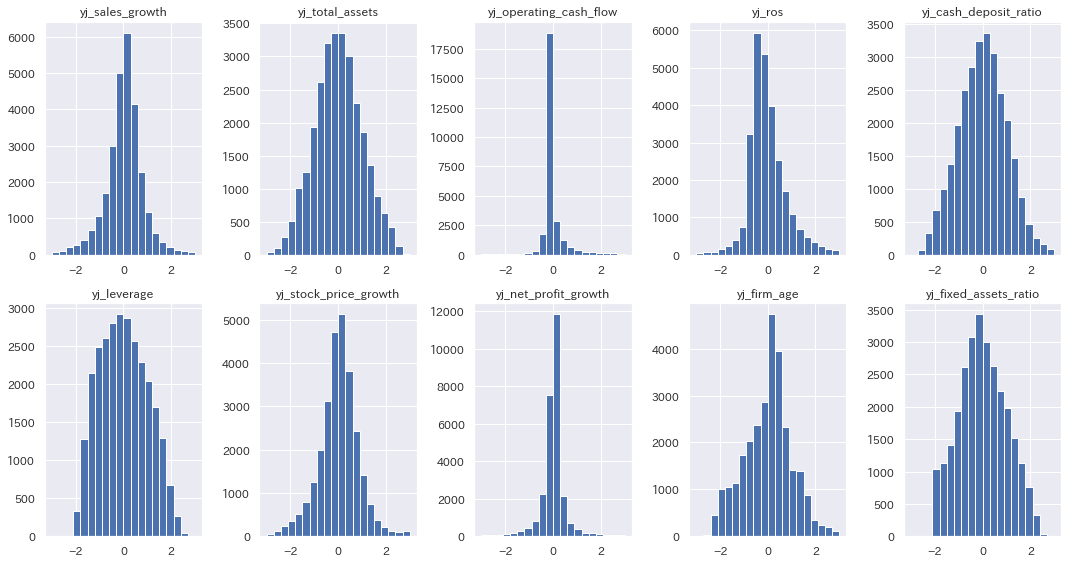

In [226]:
def draw_hist(s, row, col, q_min=0, q_max=1, x_min=-2, x_max=2):
    qmin = s.quantile(q_min)
    qmax = s.quantile(q_max)
    s2 = s[(qmin <= s) & (s <= qmax)]
    axes[row][col].set_title(s2.name)
    axes[row][col].hist(s2, range=(x_min, x_max), bins=20)

cols = [c for c in df_yj.columns if ('yj_' in c) & ~('lag_' in c)]
h = df_yj[cols]
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 8))
k = 0
for i in range(2):
    for j in range(5):
        s = h.iloc[:, k]
        draw_hist(s=s, row=i, col=j, x_min=-3, x_max=3)
        k += 1

plt.tight_layout()

<AxesSubplot:>

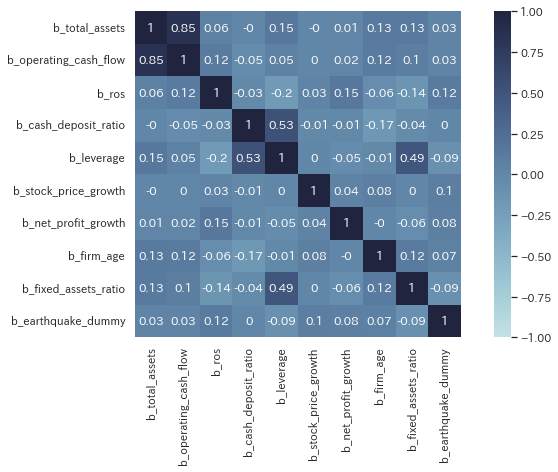

In [227]:
# 調整前相関行列
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
cols = [c for c in df.columns if c.startswith('b_')]
cols.remove('b_sales_growth')
corr = df[cols].corr(method='pearson')
corr = corr.apply(lambda x: round(x, 2))
f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(corr, annot=True, center=0, vmin=-1, vmax=1, ax=ax, cmap=cmap, square=True)

<AxesSubplot:>

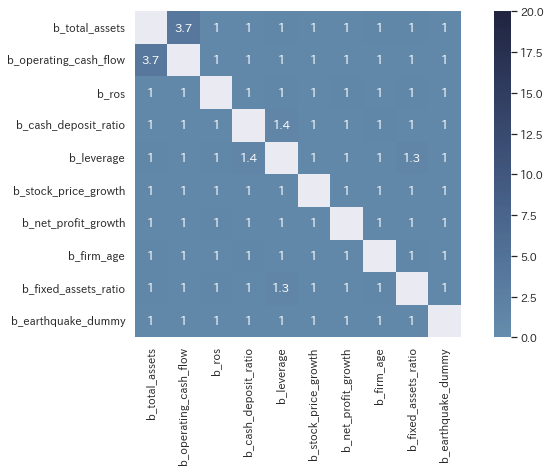

In [228]:
# 調整前VIF統計量
cols = [c for c in df.columns if c.startswith('b_')]
cols.remove('b_sales_growth')
corr = df[cols].corr(method='pearson')
vif = corr.apply(lambda x: x.apply(lambda y: 1 / (1 - math.pow(y, 2) if not y == 1 else np.nan)))
f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(vif, annot=True, center=1, vmin=0, vmax=20, ax=ax, cmap=cmap, square=True)

<AxesSubplot:>

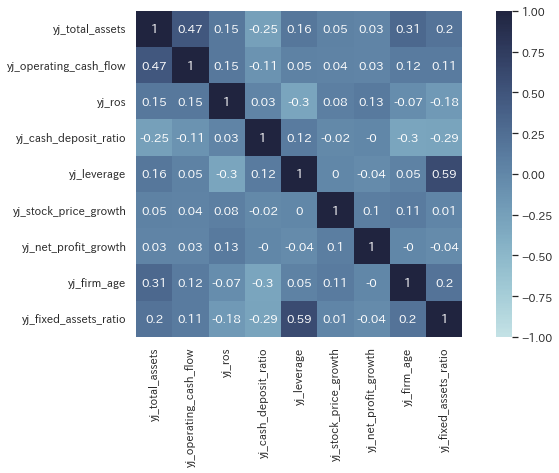

In [231]:
# 調整後相関行列
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
cols = [c for c in df_yj.columns if c.startswith('yj_')]
cols.remove('yj_sales_growth')
corr = df_yj[cols].corr(method='pearson')
corr = corr.apply(lambda x: round(x, 2))
f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(corr, annot=True, center=0, vmin=-1, vmax=1, ax=ax, cmap=cmap, square=True)

<AxesSubplot:>

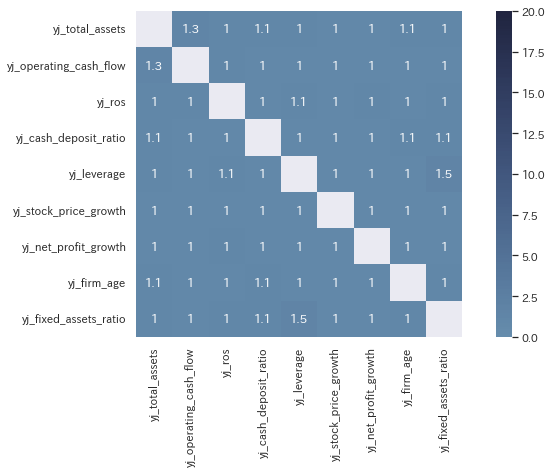

In [232]:
# 調整後VIF統計量
cols = [c for c in df_yj.columns if c.startswith('yj_')]
cols.remove('yj_sales_growth')
corr = df_yj[cols].corr(method='pearson')
vif = corr.apply(lambda x: x.apply(lambda y: 1 / (1 - math.pow(y, 2) if not y == 1 else np.nan)))
f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(vif, annot=True, center=1, vmin=0, vmax=20, ax=ax, cmap=cmap, square=True)